# Учимся работе с данными - от загрузки до моделирования

In [205]:
# Задание 1.1 - Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

# Загружаем датасет с помощью Pandas
import pandas as pd
from pandas.core.common import random_state

data = pd.read_csv('data.csv')

# Проверяем какие есть поля
# data.head()

In [206]:
# Задание 1.2 - Посмотрите на базовые статистики датасета: средние, медианы и т.д.

# Проверяем статистики по значениям полей
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [207]:
# Проверяем наличие нулевых значений в датасете
# data.isnull().sum()

In [208]:
# Отрезаем лишние колонки - 1) id - бесполезен 2) Unnamed: 32 - нет значений
cols_to_drop = ['id', 'Unnamed: 32']
data = data.drop(columns=cols_to_drop)
# data.count()

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

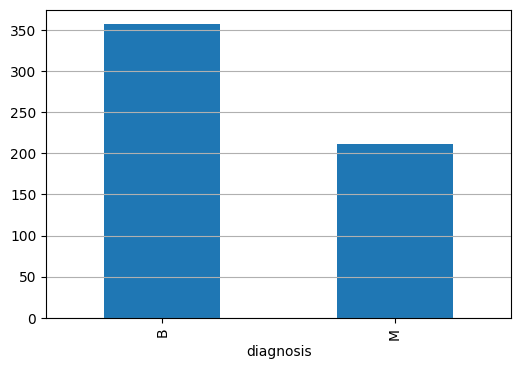

In [209]:
# Проверяем распределение целевой переменной
import matplotlib.pyplot as plt

data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')
data['diagnosis'].value_counts(normalize=True)

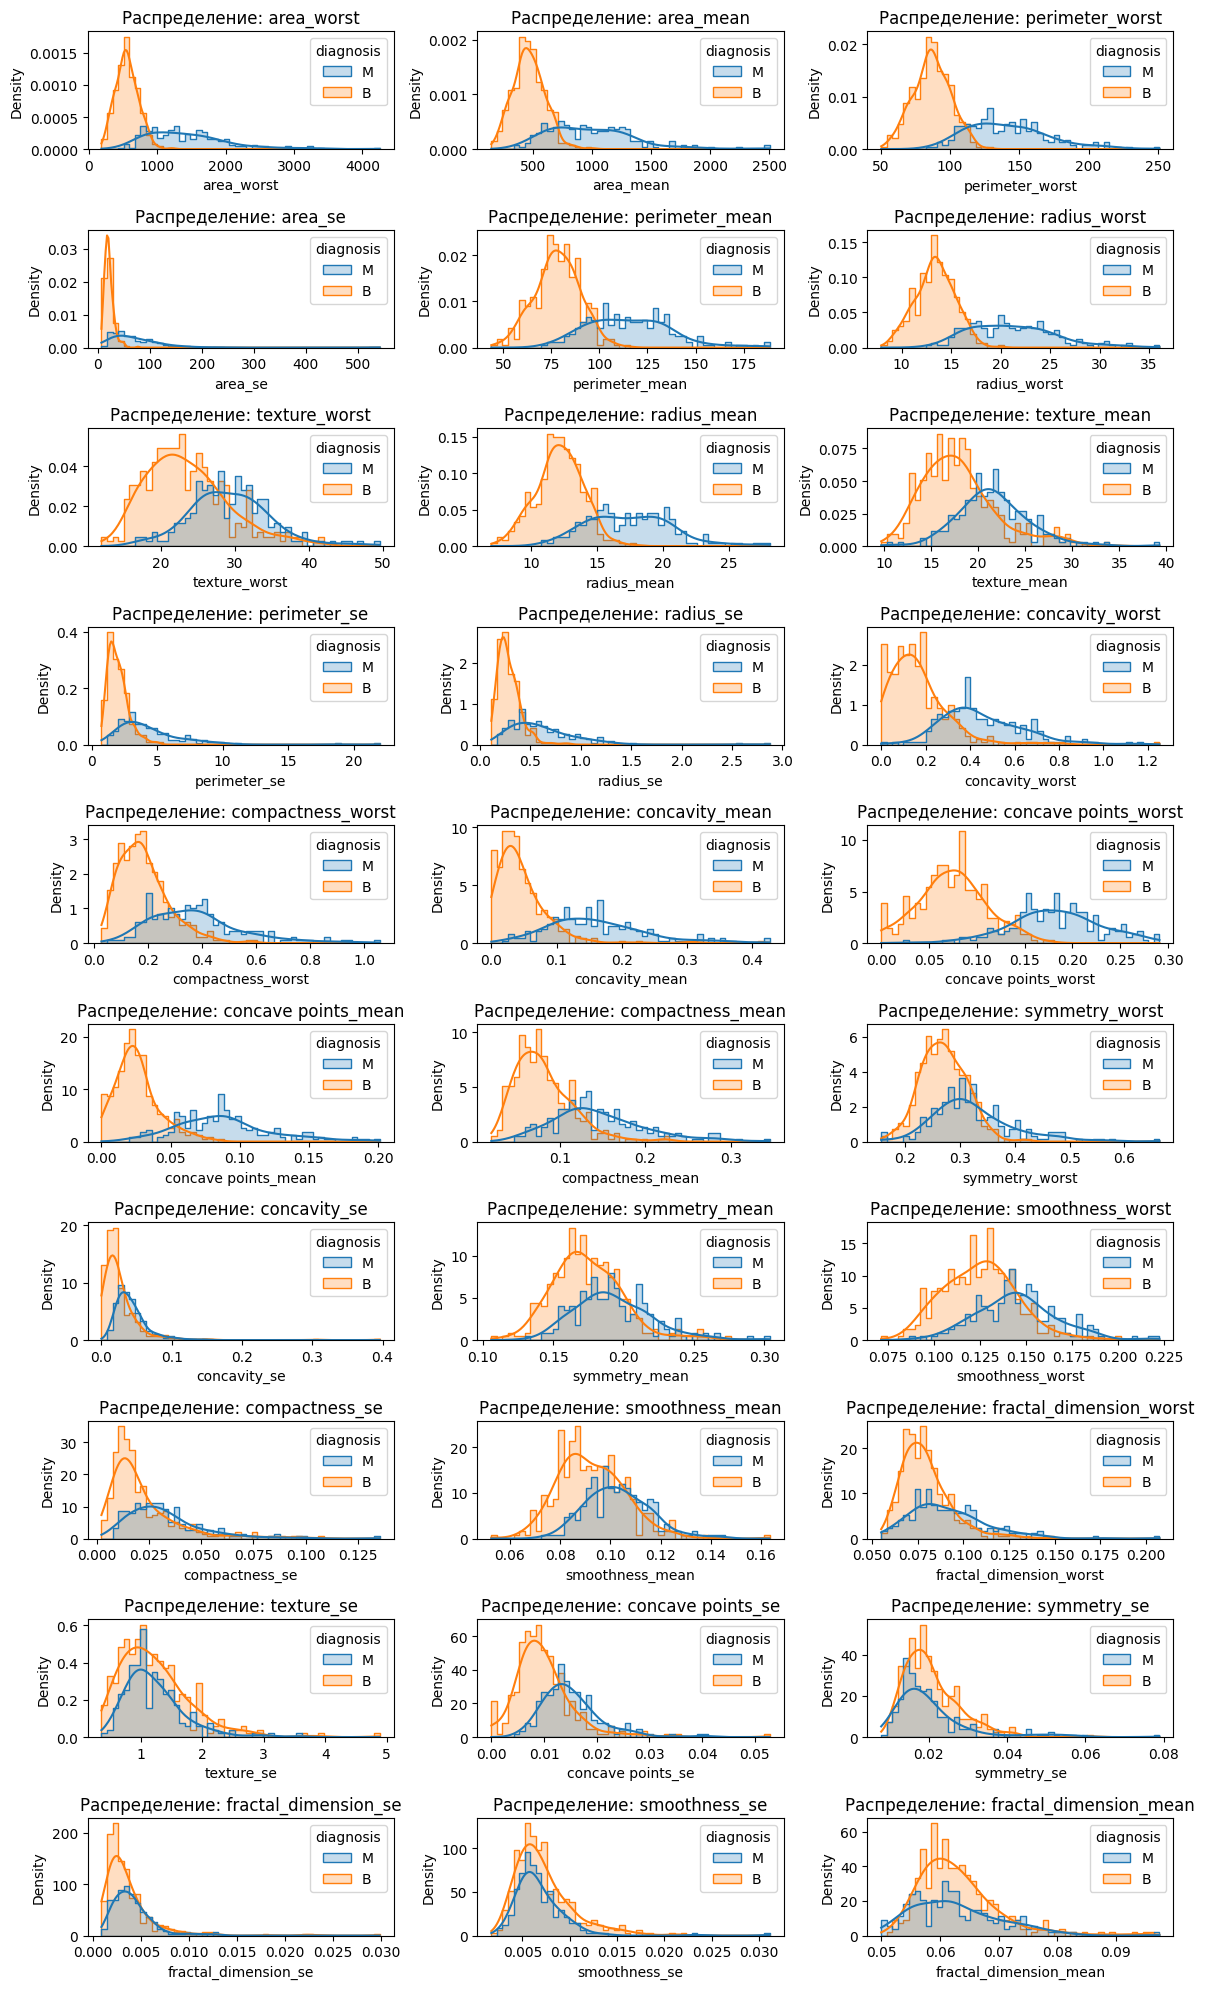

In [210]:
# Задание 1.3 - Постройте гистограммы/распределения признаков, при этом используйте целевую переменную,
# чтобы сгруппировать и раскрасить гистограммы

# Посмотрим распределение значений фичей по количеству записей
# data.hist(figsize=(18, 10))
top_features = diff.index.tolist()
_, axes = plt.subplots(10, 3, figsize=(12, 20))

for ax, col in zip(axes.ravel(), top_features):
    sns.histplot(
        data=data,
        x=col,
        hue="diagnosis",
        bins=50,
        kde=True,
        element="step",
        stat="density",
        ax=ax
    )
    ax.set_title(f"Распределение: {col}")

plt.tight_layout()
plt.show()

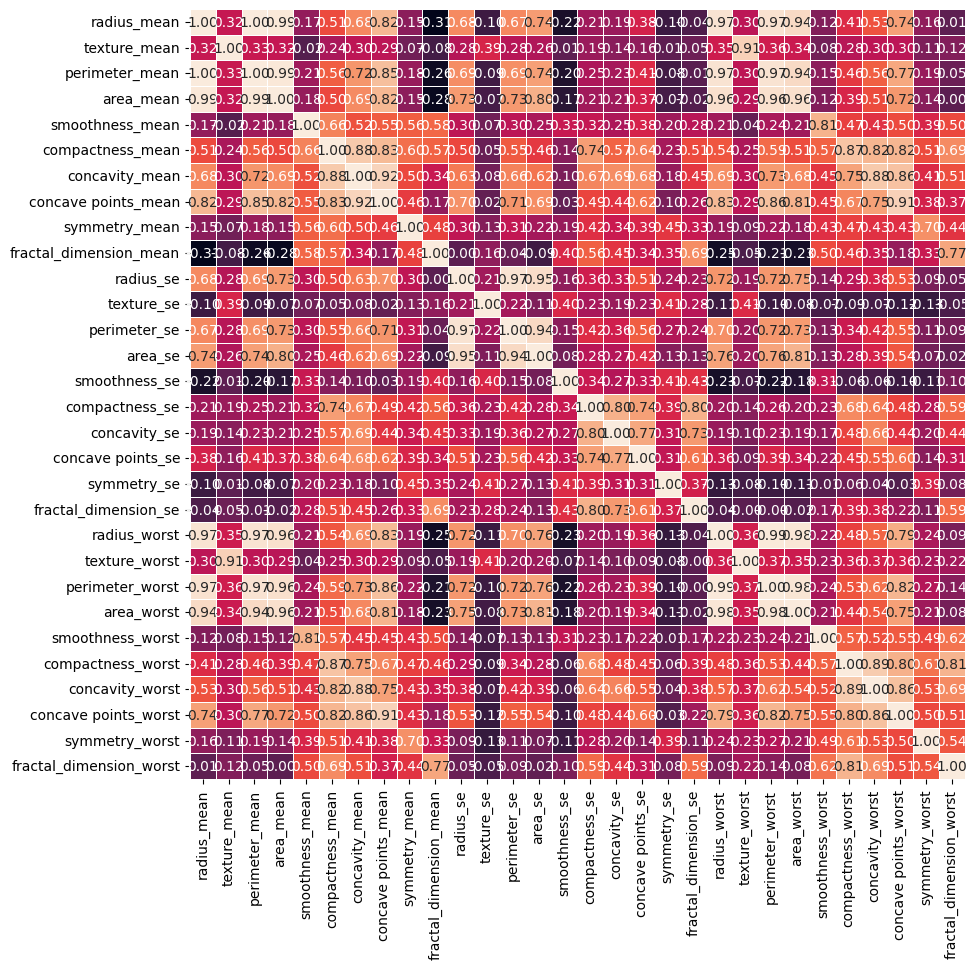

In [211]:
# Задание 1.4 - Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

# Посмотрим на хитмап корреляции фичей в их влиянии на целевую функцию, с помощью seaborn
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(['diagnosis'], axis=1).corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()


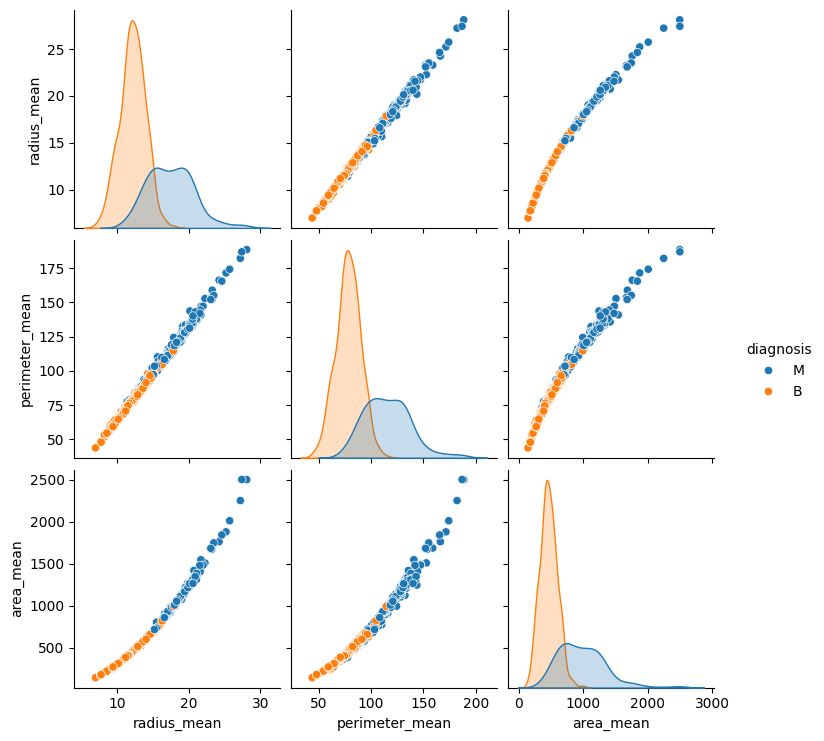

In [212]:
# Задание 1.5 - Постройте для сильно скоррелированных признаков попарные scatterplot-ы,
# действительно ли наблюдается линейная зависимость?

# Посмотрим более внимательно на коррелирующие поля
sns.pairplot(
    data,
    vars=['radius_mean', 'perimeter_mean', 'area_mean'],  # только эти переменные
    hue='diagnosis'
)

area_worst         755.600
area_mean          473.600
perimeter_worst     51.080
area_se             38.825
perimeter_mean      36.020
radius_worst         7.240
dtype: float64


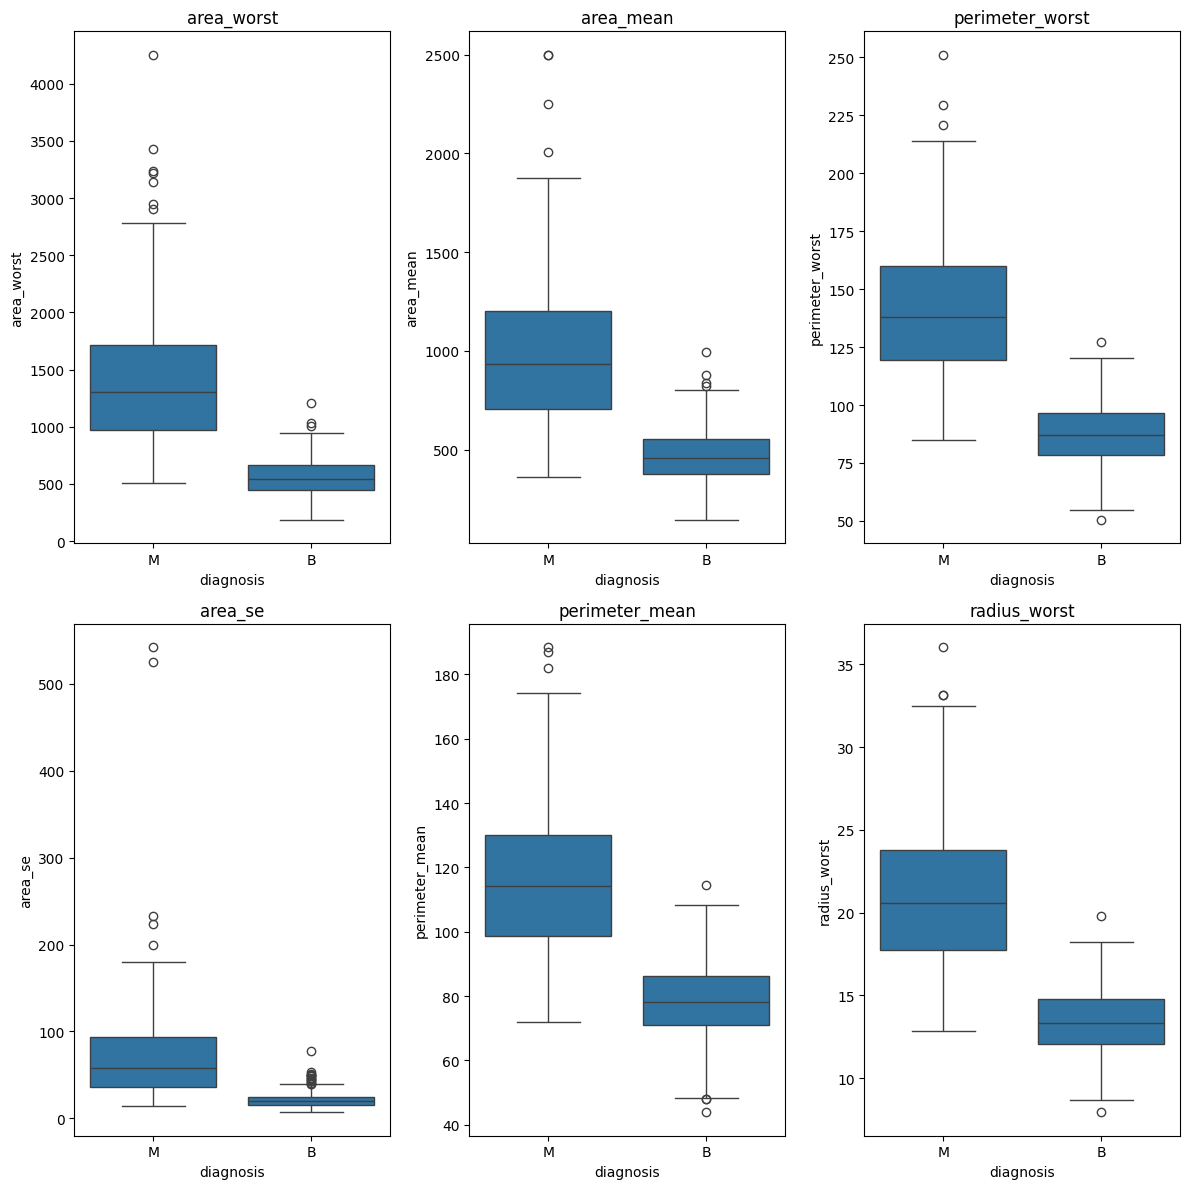

In [213]:
# Задание 1.6 - Используя boxplots и группировку по целевой переменной, попробуйте предположить,
# по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

grouped = data.groupby('diagnosis').median().T
diff = (grouped['M'] - grouped['B']).abs().sort_values(ascending=False)
top_features = diff.head(6).index.tolist()

_, axes = plt.subplots(2, 3, figsize=(12, 12))
for ax, col in zip(axes.ravel(), top_features):
    sns.boxplot(x='diagnosis', y=col, data=data, ax=ax)
    ax.set_title(col)

print(diff.head(6))

plt.tight_layout()
plt.show()

In [214]:
# Видим что radius_mean и perimeter_mean - полностью коррелируют (линейная зависимость), поэтому можно оставить только один из них
# Отрезаем лишние колонки
# cols_to_drop = ['perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst','area_worst'] - снижает метрики
# cols_to_drop = ['perimeter_mean','area_mean'] - тоже снижает метрики
cols_to_drop = ['perimeter_mean',]
data = data.drop(columns=cols_to_drop)
# data.count()

# Переводим целевые значения в int
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [215]:
# Задание 2.1 - Разбейте данные на train-test, отложив 30% выборки для тестирования

# Разбиваем датасет на train и test, со стратификацией, т.к. B в 2 раза больше чем M
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'],
    axis=1), data['diagnosis'],
    test_size=0.30,
    random_state=42,
    stratify=data['diagnosis']
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 29), (171, 29), (398,), (171,))

In [216]:
# Задание 2.2 - Приведите все непрерывные переменные к одному масштабу при помощи стандартизации.
# Кратко поясните, почему стандартизация здесь нужна.

# Приводим значения признаков к одному масштабу, т.к. если посмотреть на медианы признаков (например так - data.describe()),
# то видим что где-то значения это сотни и тысячи, а где-то сотые доли
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [217]:
# Задание 2.3 - Постройте модель kNN «из коробки» без настройки параметров.
# Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score),
# постройте ROC-кривую и посчитайте площадь под ней.

# Learning из коробки
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

print("Из коробки k - n_neighbors: {}".format(model.n_neighbors))
print("Из коробки p - расстояние (норма): {}".format(model.p))

# Проверяем метрики модели на тестовой выборке
y_test_predictions = model.predict(X_test_scaled)
print("--------")
print("Resulting test score - accuracy_score: {:.3f}".format(accuracy_score(y_test_predictions, y_test)))
print("Resulting test score - precision_score: {:.3f}".format(precision_score(y_test_predictions, y_test)))
print("Resulting test score - recall_score: {:.3f}".format(recall_score(y_test_predictions, y_test)))
print("Resulting test score - f1_score: {:.3f}".format(f1_score(y_test_predictions, y_test)))


Из коробки k - n_neighbors: 5
Из коробки p - расстояние (норма): 2
--------
Resulting test score - accuracy_score: 0.965
Resulting test score - precision_score: 0.906
Resulting test score - recall_score: 1.000
Resulting test score - f1_score: 0.951


In [218]:
# Задание 2.4 - Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)

# Learning с подбором параметров модели с помощью GridSearchCV
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 20),
    'p': range(1, 4)
}

model = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
model.fit(X_train_scaled, y_train)

print("Best CV score - f1_score: {:.3f}".format(model.best_score_))
print("Best CV k - n_neighbors: {}".format(model.best_estimator_.n_neighbors))
print("Best CV p - расстояние (норма): {}".format(model.best_estimator_.p))

# Проверяем метрики модели на тестовой выборке
y_test_predictions = model.predict(X_test_scaled)
print("--------")
print("Resulting test score - accuracy_score: {:.3f}".format(accuracy_score(y_test_predictions, y_test)))
print("Resulting test score - precision_score: {:.3f}".format(precision_score(y_test_predictions, y_test)))
print("Resulting test score - recall_score: {:.3f}".format(recall_score(y_test_predictions, y_test)))
print("Resulting test score - f1_score: {:.3f}".format(f1_score(y_test_predictions, y_test)))

Fitting 5 folds for each of 57 candidates, totalling 285 fits
Best CV score - f1_score: 0.957
Best CV k - n_neighbors: 3
Best CV p - расстояние (норма): 1
--------
Resulting test score - accuracy_score: 0.971
Resulting test score - precision_score: 0.922
Resulting test score - recall_score: 1.000
Resulting test score - f1_score: 0.959
